# Project: Predicting House Prices Using Linear Regression

## Analysis Objective

The objective of this data analysis report is to perform linear regression analysis based on existing house sales prices and their corresponding attributes. The goal is to utilize the resulting linear regression model to predict the price of the following house with unknown sale price based on its attributes:

Area of 6,500 square feet, 4 bedrooms, 2 bathrooms, a total of 2 floors, not located on a main road, no guest room, with a basement, with a water heater, no air conditioning, parking space for 2 cars, located in the city's preferred neighborhood, with simple decoration.

## Introduction

The dataset `house_price.csv` records the transaction prices of over five hundred houses, along with related attribute information such as house area, number of bedrooms, number of bathrooms, number of floors, whether it is located on a main road, whether it has a guest room, and so on.

The meaning of each column in `house_price.csv` is as follows:  
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区  (preferred area)
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

Import the necessary libraries for data analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data.

In [2]:
ori_data = pd.read_csv("E:\\Python\\e_analyze_data\\house_price.csv")
ori_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Evaluate and clean data.

Create copy.

In [3]:
clean_data = ori_data.copy()

### Data tidiness.

In [4]:
clean_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


From a samples of 10 rows, data conform to NF-3.  
Therefore, there is no structural issues.

### Data cleanliness.

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


From the output, there are a total of 545 observations and there are no missing value.    
`mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus` should be Category.

In [6]:
clean_data['mainroad'] = clean_data['mainroad'].astype('category')
clean_data['guestroom'] = clean_data['guestroom'].astype('category')
clean_data['basement'] = clean_data['basement'].astype('category')
clean_data['hotwaterheating'] = clean_data['hotwaterheating'].astype('category')
clean_data['airconditioning'] = clean_data['airconditioning'].astype('category')
clean_data['prefarea'] = clean_data['prefarea'].astype('category')
clean_data['furnishingstatus'] = clean_data['furnishingstatus'].astype('category')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### Handle duplicate data.etc

#### Handle inconsistent data.

Inconsistent data might be in all categorical variable.We need to check if there are multiple different values referring to the same variable. 

In [7]:
clean_data['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [8]:
clean_data['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [9]:
clean_data['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [10]:
clean_data['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [11]:
clean_data['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [12]:
clean_data['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [13]:
clean_data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

From the output above, there is no inconsistent data.

#### Handle invalid or incorrect data.

In [14]:
clean_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Based on the stats above, there are no unrealistic values in the data.

## Explore data.

In [15]:
# Set the color palette to 'pastel'
sns.set_palette("pastel")

### House_price distribution.

In [16]:
clean_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<AxesSubplot:ylabel='price'>

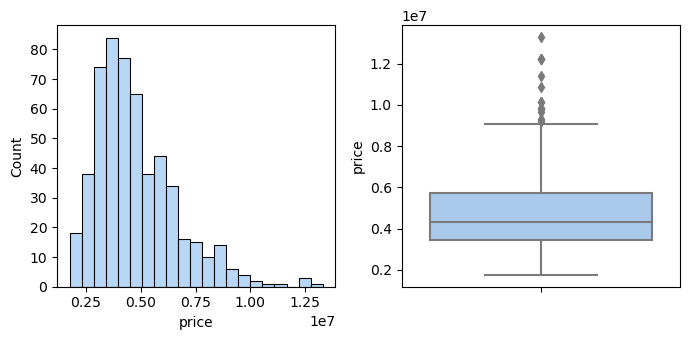

In [17]:
plt.rcParams["figure.figsize"] = [7.00, 3.5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)
sns.histplot(data=clean_data, x='price', ax=axes[0])
sns.boxplot(data=clean_data, y='price', ax=axes[1])

house_price 呈现右偏态，  
说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高。，

`house_price` distribution is right-skewed.  
This means most houses are moderately priced, but a few extremely high prices are pulling up the average.

### Area distribution.

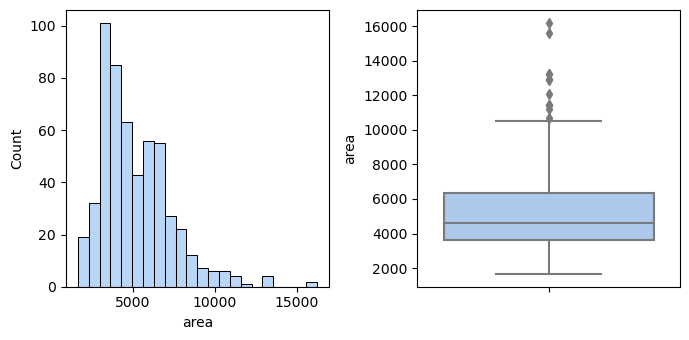

In [18]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=clean_data, x='area', ax=axes[0])
sns.boxplot(data=clean_data, y='area', ax=axes[1])
plt.show()

Similar to `house_price`, the `area` distribution is also right-skewed.

### Relationship between house_price and area.

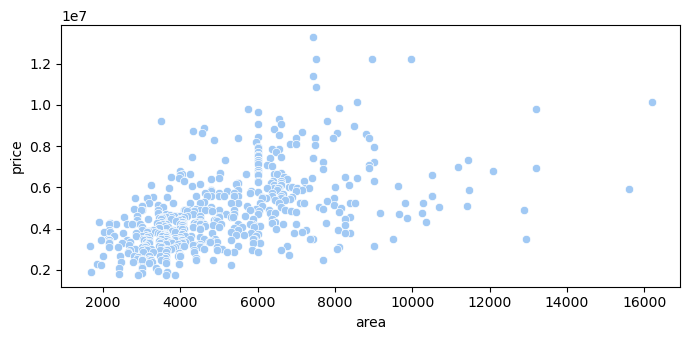

In [19]:
sns.scatterplot(data=clean_data, x='area', y='price')
plt.show()

From the scatter plot, 大致呈正相关，关系强度需要后续计算相关系数r

From the scatter plot, we can roughly see a positive correlation, but we'll need to calculate the 'r' value to know how strong it is.

### Bedrooms and house_price.

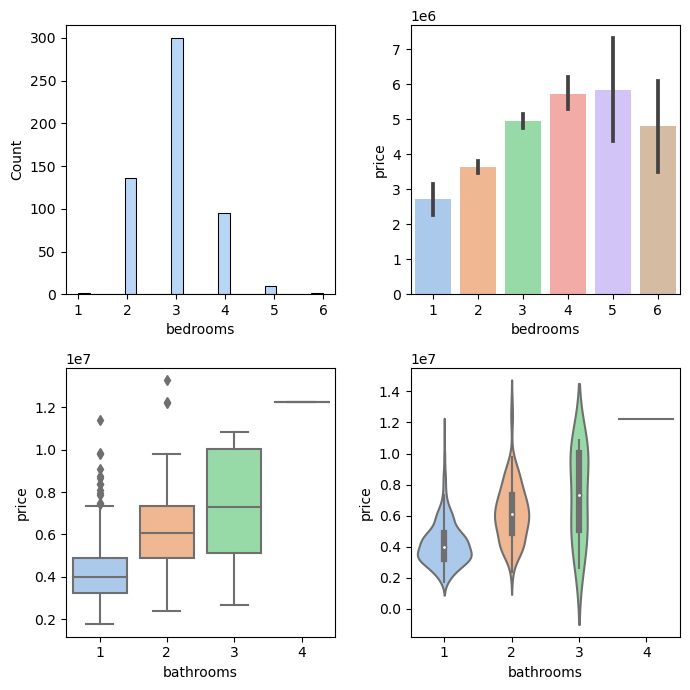

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=clean_data, x='bedrooms', ax=axes[0, 0])
sns.barplot(data=clean_data, x='bedrooms', y='price', ax=axes[0, 1])

# "Carmen's move"
sns.boxplot(data=clean_data, x='bathrooms', y='price', ax=axes[1, 0])
sns.violinplot(data=clean_data, x='bathrooms', y='price', ax=axes[1, 1])
plt.show()

clean_data里面，房子的bedroom范围在1-6，大多数房子有2-4个。  
From the barplot，当bedroom num < 5个时，bedroom num 正比于 house_price,但一旦 > 5个，house_price并不一定相应更高。

In `clean_data`, the number of bedrooms ranges from 1 to 6, with most houses typically having 2 to 4 bedrooms.  

From the chart, the number of bedrooms is positively correlated with the house_price when there are fewer than 5.However, once there are more than 5 bedrooms, this relationship breaks down.

### Bathrooms and house_price.

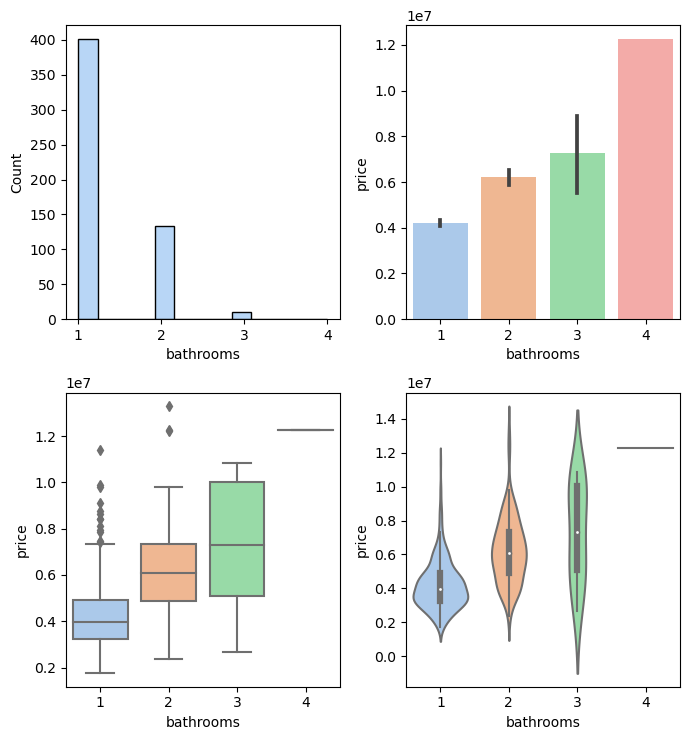

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7.5))
sns.histplot(data=clean_data, x='bathrooms', ax=axes[0, 0])
sns.barplot(data=clean_data, x='bathrooms', y='price', ax=axes[0, 1])
sns.boxplot(data=clean_data, x='bathrooms', y='price', ax=axes[1, 0])
sns.violinplot(data=clean_data, x='bathrooms', y='price', ax=axes[1, 1])
plt.show()

In `clean_data`, the number of bathrooms ranges from 1 to 4, with 1 bathroom being the most common.  

From the chart, the number of bathrooms is positively correlated with the house_price.

### Story number and house_price.

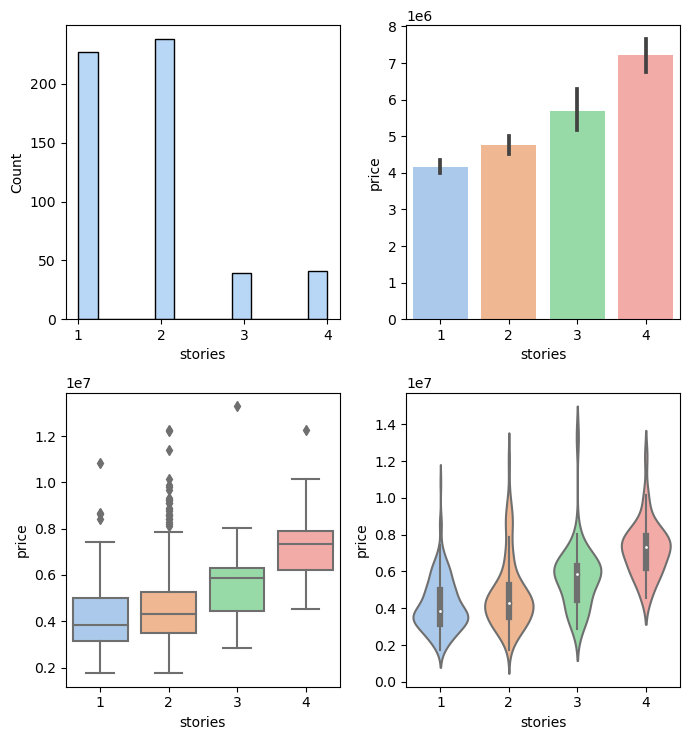

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(7.00, 7.50))
sns.histplot(data=clean_data, x='stories', ax=axes[0, 0])
sns.barplot(data=clean_data, x='stories', y='price', ax=axes[0, 1])
sns.boxplot(data=clean_data, x='stories', y='price', ax=axes[1, 0])
sns.violinplot(data=clean_data, x='stories', y='price', ax=axes[1, 1])
plt.show()

### Parking number and house_price.

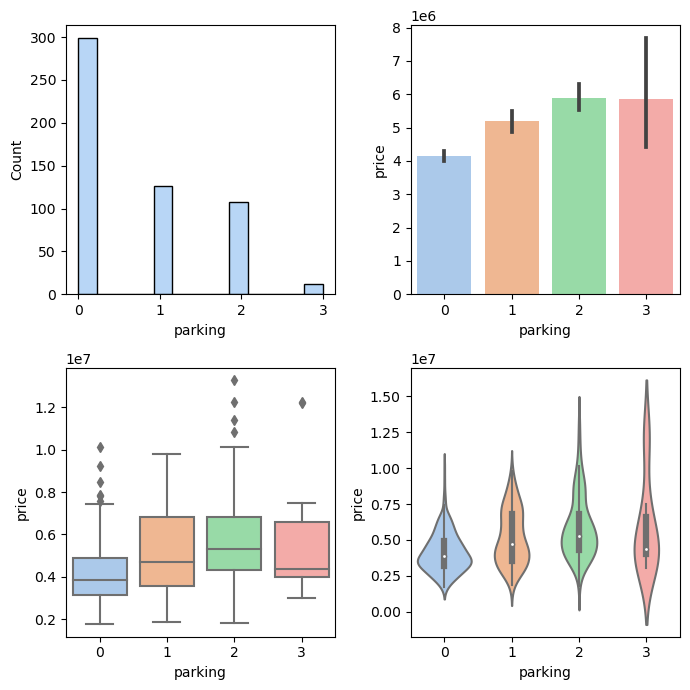

In [23]:
# Official version. Do not delete!!!
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=clean_data, x='parking', ax=axes[0, 0])
sns.barplot(data=clean_data, x='parking', y='price', ax=axes[0, 1])
sns.boxplot(data=clean_data, x='parking', y='price', ax=axes[1, 0])
sns.violinplot(data=clean_data, x='parking', y='price', ax=axes[1, 1])
plt.show()

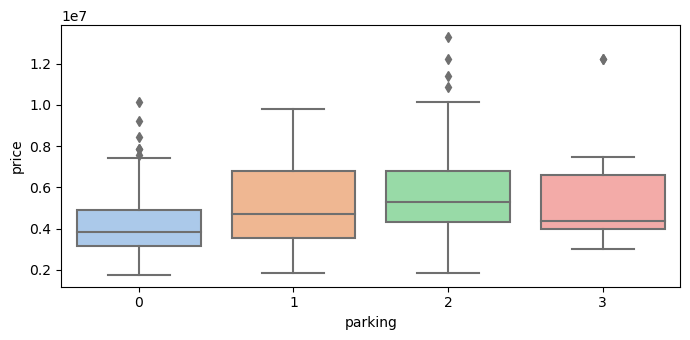

In [24]:
# This is experimental content. Use with caution!
# parking_groups = sorted(clean_data['parking'].unique())
# counts = clean_data['parking'].value_counts().sort_index()
# wid = counts / counts.max()
sns.boxplot(data=clean_data, x='parking', y='price')
plt.show()

In `clean_data`, the number of parking ranges from 0 to 3. Houses with no parking are the majority, followed by those with 1 parking and then those with 2 parking.

From the chart, the number of parking has a positive correlation with house_price, but this correlation doesn't hold when there are more than 2 parking.

### The relationship between main road location and house_price.

In [25]:
clean_data.sample(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
192,5040000,6600,3,1,1,yes,yes,yes,no,no,0,yes,furnished
358,3745000,3480,2,1,1,yes,no,no,no,no,0,yes,semi-furnished
361,3710000,6020,3,1,1,yes,no,no,no,no,0,no,semi-furnished
242,4550000,3640,3,1,2,yes,no,no,no,yes,0,no,furnished


In [26]:
mainroad_num = clean_data['mainroad'].value_counts()
mainroad_num

yes    468
no      77
Name: mainroad, dtype: int64

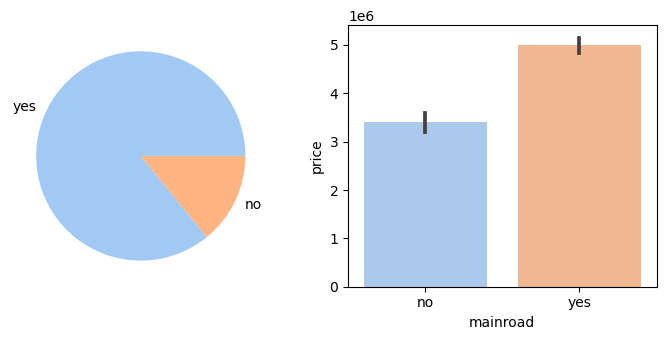

In [27]:
# Advised by Lily.
fig, axes = plt.subplots(1, 2, figsize=(7.00, 3.50))
mainroad_label = mainroad_num.index
axes[0].pie(x=mainroad_num, labels=mainroad_label)
sns.barplot(data=clean_data, x='mainroad', y='price', ax=axes[1])
plt.show()

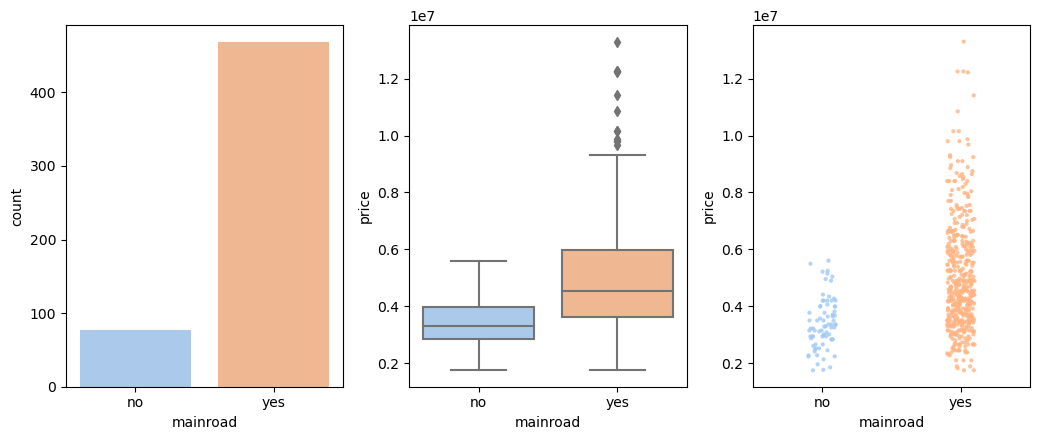

In [28]:
# "Carmen's move"
fig, axes = plt.subplots(1, 3, figsize=(10.50, 4.50))
sns.countplot(data=clean_data, x='mainroad', ax=axes[0])
sns.boxplot(data=clean_data, x='mainroad', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='mainroad', y='price', ax=axes[2], jitter=True, alpha=0.8, size=3)
plt.show()

Most houses are located on the mainroad.  

From the chart, houses on the main road have higher prices.

### The presence of guestroom and house_price

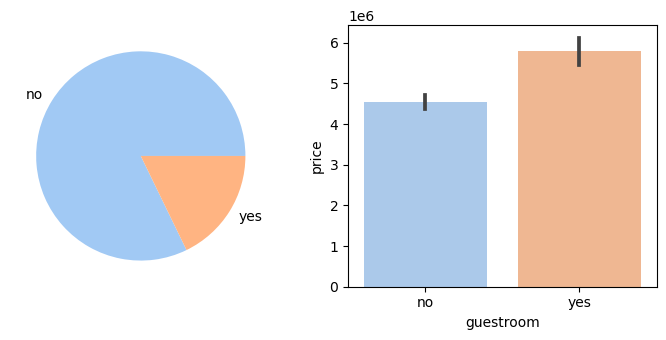

In [29]:
# Advised by Lily.
fig, axes = plt.subplots(1, 2, figsize=(7.00, 3.50))
guestroom_num = clean_data['guestroom'].value_counts()
guestroom_label = guestroom_num.index
axes[0].pie(x=guestroom_num, labels=guestroom_label)
sns.barplot(data=clean_data, x='guestroom', y='price',ax=axes[1])
plt.show()

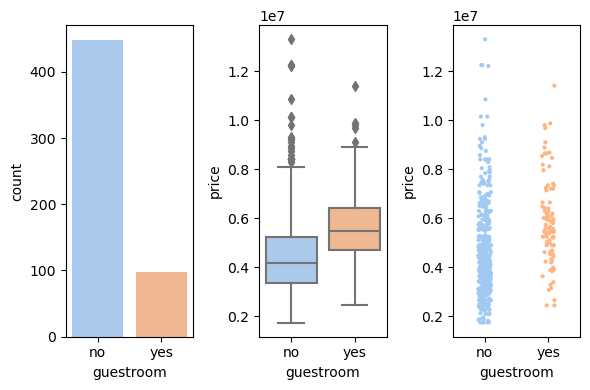

In [30]:
# "Carmen's move"
fig, axes = plt.subplots(1, 3, figsize=(6, 4.0))
sns.countplot(data=clean_data, x='guestroom', ax=axes[0])
sns.boxplot(data=clean_data, x='guestroom', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='guestroom', y='price', ax=axes[2], jitter=True, alpha=0.99, size=3.0)
plt.show()

In `clean_data`, most houses have no guestroom.  

From the chart, the houses with guestroom have higher price.

### The presence of basement and house_price.

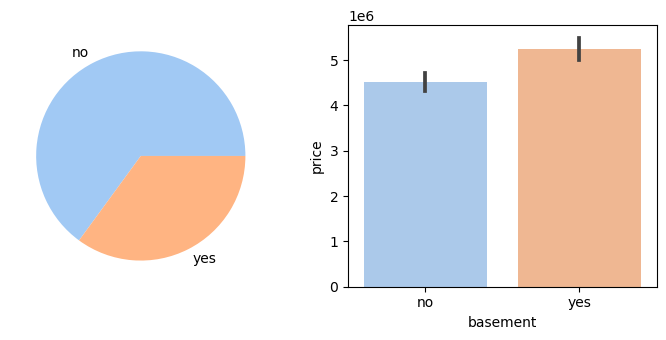

In [31]:
# Advised by Lily.
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))
basement_num = clean_data['basement'].value_counts()
basement_label = basement_num.index
axes[0].pie(x=basement_num, labels=basement_label)
sns.barplot(data=clean_data, x='basement', y='price', ax=axes[1])
plt.show()

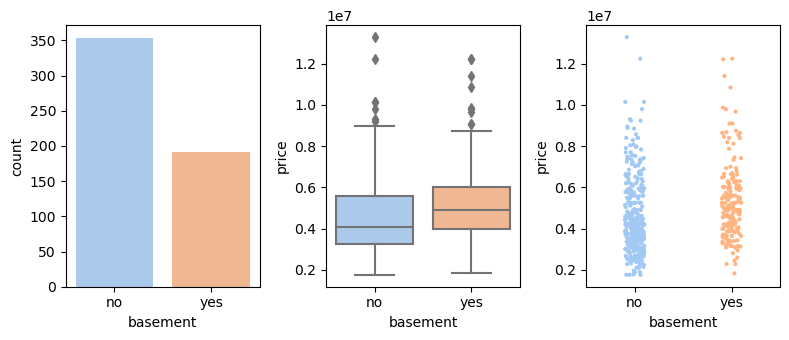

In [32]:
# "Carmen's move"
fig, axes = plt.subplots(1, 3, figsize=(8, 3.5))
sns.countplot(data=clean_data, x='basement', ax=axes[0])
sns.boxplot(data=clean_data, x='basement', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='basement', y='price', ax=axes[2], jitter=True,  size=3)
plt.show()

### The presence of airconditioner and house_price.

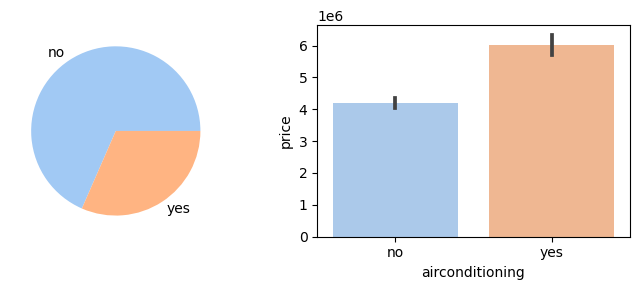

In [33]:
# Advised by Lily.  sns.countplot(data=clean_data, x='airconditioning', ax=axes[0])
aircondition_num = clean_data['airconditioning'].value_counts()
aircondition_label = aircondition_num.index
fig, axes = plt.subplots(1, 2, figsize=(7.00, 3.00))
axes[0].pie(x=aircondition_num, labels=aircondition_label)
sns.barplot(data=clean_data, x='airconditioning', y='price', ax=axes[1])
plt.show()

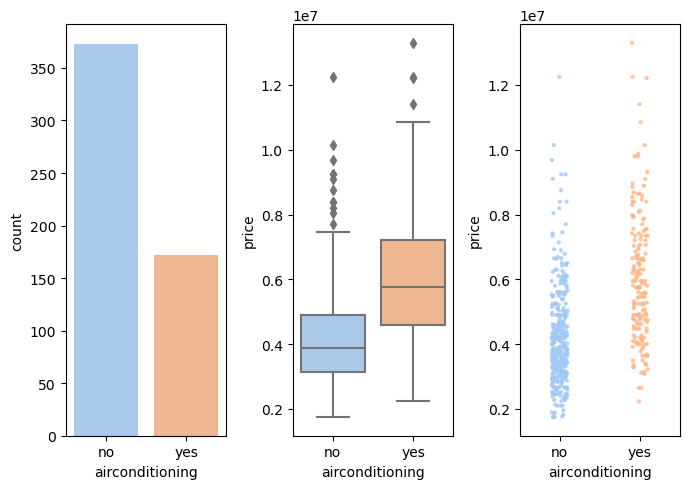

In [34]:
# "Carmen's move."
fig, axes = plt.subplots(1, 3, figsize=(7.00, 5.00))
sns.countplot(data=clean_data, x='airconditioning', ax=axes[0])
sns.boxplot(data=clean_data, x='airconditioning', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='airconditioning', y='price', ax=axes[2], jitter=True, alpha=0.8, size=3)
plt.show()

In `clean_data`, most houses have no airconditioner.

From the chart, the houses with airconditioner tend to have a higher price.

### The presence of water heater and house_price.

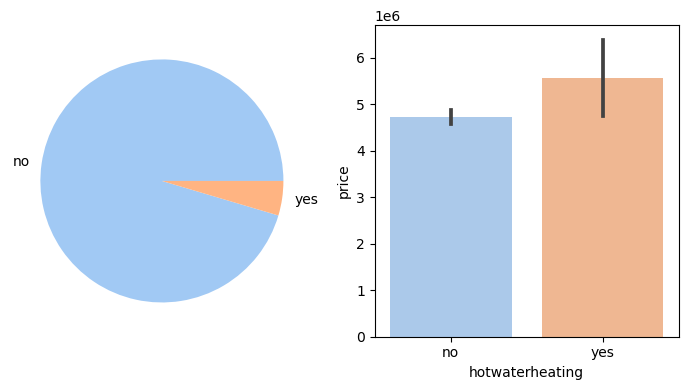

In [35]:
# Advise by Lily.
heater_num = clean_data['hotwaterheating'].value_counts()
heater_label = heater_num.index
fig, axes = plt.subplots(1, 2, figsize=(7.00, 4.00))
axes[0].pie(x=heater_num, labels=heater_label)
sns.barplot(data=clean_data, x='hotwaterheating', y='price')
plt.show()

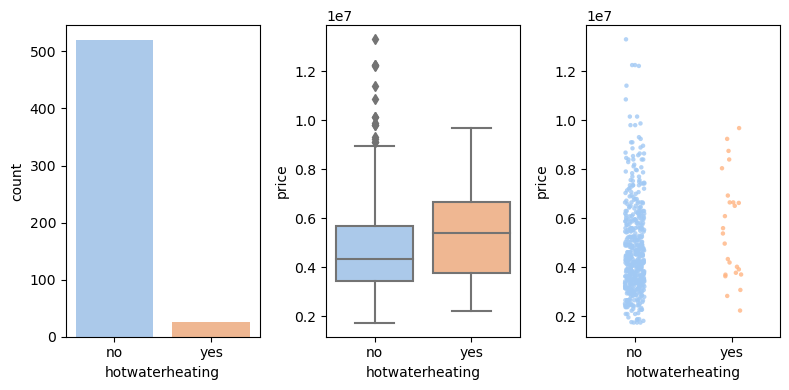

In [36]:
# "Carmen's move."
fig, axes = plt.subplots(1, 3, figsize=(8.00, 4.00))
sns.countplot(data=clean_data, x='hotwaterheating', ax=axes[0])
sns.boxplot(data=clean_data, x='hotwaterheating', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='hotwaterheating', y='price', ax=axes[2], jitter=True, alpha=0.8, size=3.2)
plt.show()

In the `clean_data`, most houses don't have water heating.

From the chart, the houses with water heating have a higher price.

### The relationship between location in the prefarea and house_price.

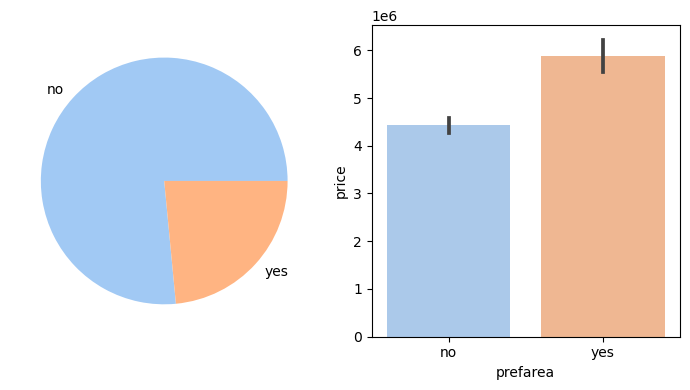

In [37]:
# Advised by Lily.
prefarea_num = clean_data['prefarea'].value_counts()
prefarea_label = prefarea_num.index
fig, axes = plt.subplots(1, 2, figsize=(7.00, 4.00))
axes[0].pie(x=prefarea_num, labels=prefarea_label)
sns.barplot(data=clean_data, x='prefarea', y='price', ax=axes[1])
plt.show()

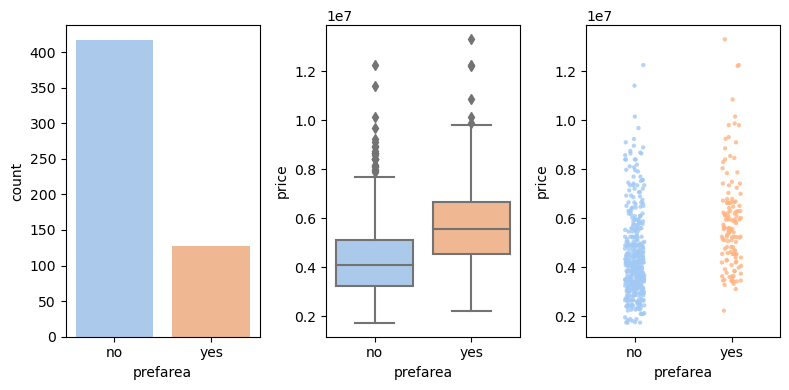

In [38]:
# "Carmen's move."
fig, axes = plt.subplots(1, 3, figsize=(8.00, 4.00))
sns.countplot(data=clean_data, x='prefarea', ax=axes[0])
sns.boxplot(data=clean_data, x='prefarea', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='prefarea', y='price', ax=axes[2], jitter=True, alpha=0.8, size=3.1)
plt.show()

In `clean_data`, most houses aren't located in prefarea. 

From the chart, the houses located in the prefarea have a higher price.

### The relationship between furnishing status and house_price.

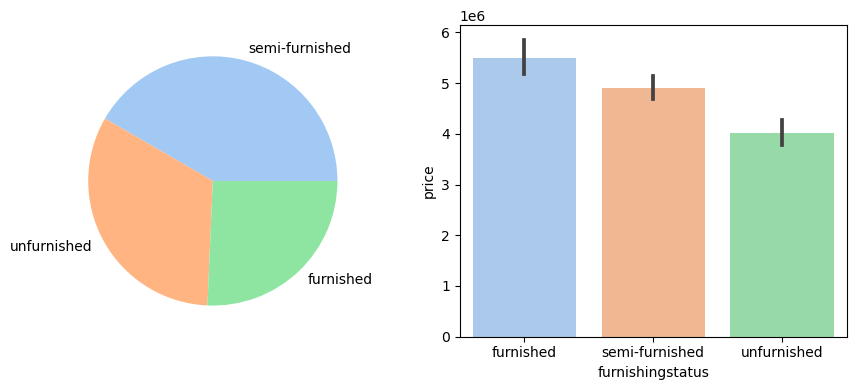

In [39]:
# Advised by Lily.
furnish_num = clean_data['furnishingstatus'].value_counts()
furnish_label = furnish_num.index
fig, axes = plt.subplots(1, 2, figsize=(9.00, 4.00))
axes[0].pie(x=furnish_num, labels=furnish_label)
sns.barplot(data=clean_data, x='furnishingstatus', y='price', ax=axes[1])
plt.show()

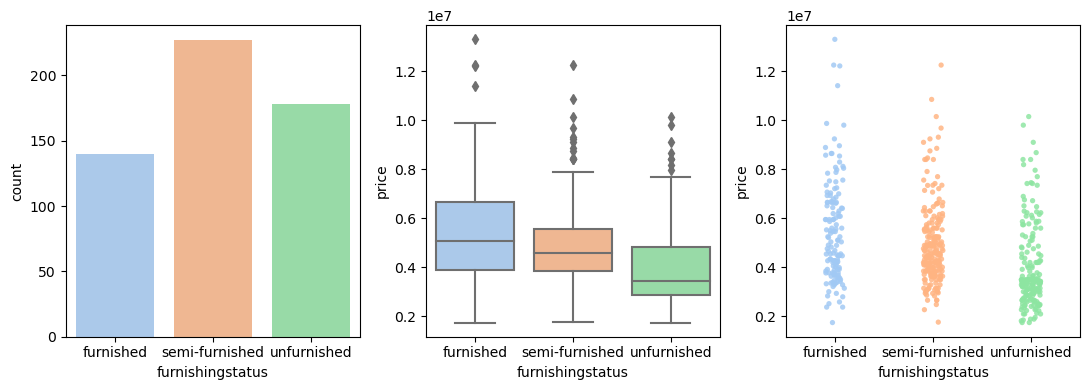

In [40]:
# "Carmen's move."
fig, axes = plt.subplots(1, 3, figsize=(11.00, 4.00))
sns.countplot(data=clean_data, x='furnishingstatus', ax=axes[0])
sns.boxplot(data=clean_data, x='furnishingstatus', y='price', ax=axes[1])
sns.stripplot(data=clean_data, x='furnishingstatus', y='price', ax=axes[2], jitter=True, alpha=0.84, size=3.8)
plt.show()

In `clean_data`, most houses are semi-furnished or unfurnished, with about 1/4 being furnished.

From the chart, furnished > semi-furnished > unfurnished, in terms of price.

## Analysis data.

Import the lib for linear regression.

In [41]:
import statsmodels.api as sm

In [42]:
lr_price = clean_data.copy()
lr_price.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
157,5495000,2817,4,2,2,no,yes,yes,no,no,1,no,furnished
369,3675000,3600,2,1,1,yes,no,no,no,no,0,no,furnished
258,4480000,4040,3,1,2,yes,no,no,no,no,1,no,semi-furnished
165,5383000,6450,3,2,1,yes,yes,yes,yes,no,0,no,unfurnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [43]:
# 把 category 变成 dummy variable
lr_price = pd.get_dummies(
    lr_price, 
    columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
             'airconditioning', 'prefarea', 'furnishingstatus'],
    drop_first = True,
    dtype = int)
lr_price.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [44]:
# 定义因变量
y = lr_price['price']

In [45]:
# 定义自变量
X = lr_price.drop('price', axis=1)

In [46]:
# check the correlation.
# Approach 1: absolutely values.
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


From the output, between any two variables, $|r|$  <= 0.8.

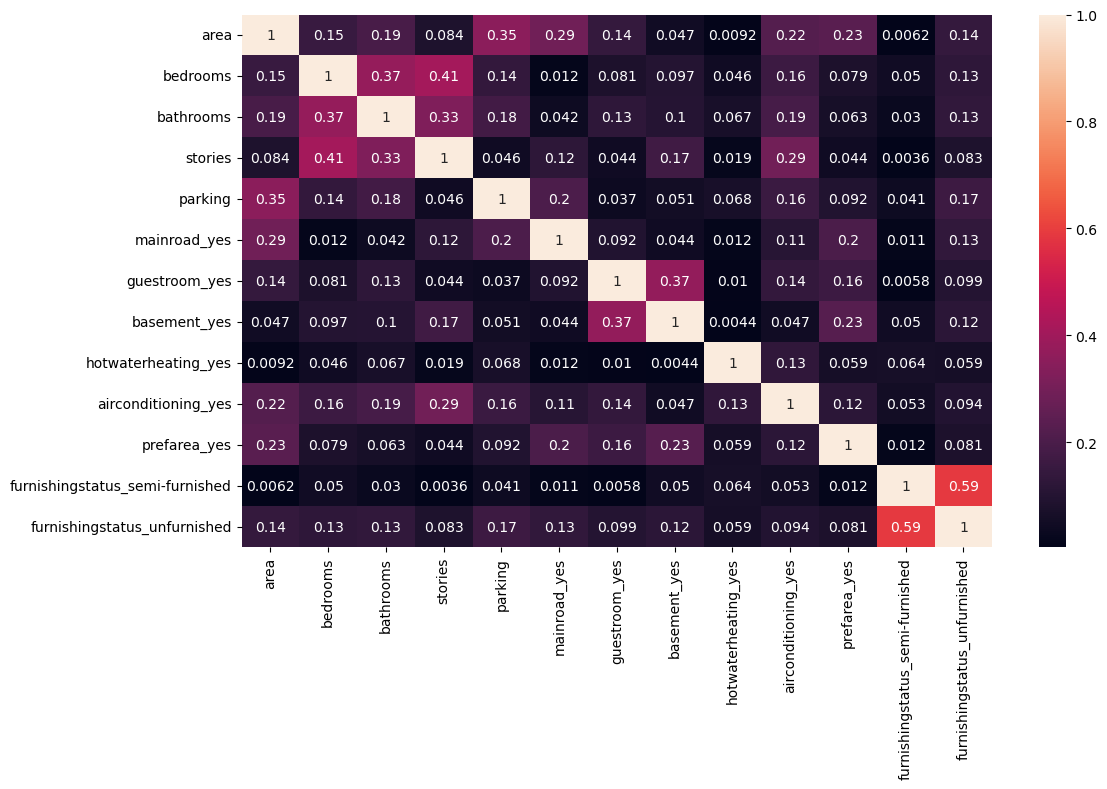

In [47]:
# Approach 2: heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr().abs(), annot=True)
plt.show()

In [48]:
# add intercept (截距)
X = sm.add_constant(X)

In [49]:
# build linear regression model, 并对数据进行拟合
model = sm.OLS(y, X).fit()

In [50]:
# 查看模型结果
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          9.07e-123
Time:                        22:04:31   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we set the $α$ at 0.05, p-value indicate that the model doesn't show a statiscally significant effect on house_price for the following factors:  
**bedrooms**  
**furnishingstatus_semi-furnished**  
**const**(the intercept of linear equation)  

Remove these variables and build the linear model again.

In [51]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [52]:
model = sm.OLS(y, X).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                        0.00
Time:                        22:04:31   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notice that after removing variables with high p-value, $R^2$ increased from 0.682 to 0.957, improving the model's fit to the data.

Based on the coef,   
the model predicts that an increase(or presence) of the following factors significantly increases house_price:  
**area**    
**bathrooms**  
**stories**  
**parking**  
**mainroad_yes**  
**guestroom_yes**  
**basement_yes**    
**hotwaterheating_yes**    
**airconditioning_yes**   
**prefarea_yes**  

the model predicts tha an increasa(or presence) of the following factors significantly decreaces house_price:  
**furnishingstatus_unfurnished**

In [54]:
# Information for house to predict.
#  Area of 6,500 square feet, 4 bedrooms, 2 bathrooms, a total of 2 floors, 
# not located on a main road, no guest room, with a basement, with a water heater, 
# no air conditioning, parking space for 2 cars, located in the city's preferred neighborhood, 
# with simple decoration.

In [82]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [85]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [87]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [90]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [91]:
predict_value = model.predict(price_to_predict)
predict_value

0    7.071927e+06
dtype: float64

The predicted price from the linear regression model is: 7,071,927.